In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import  textblob
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_excel('D:/Analytics class/PROJECT/Machine lerning/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform/Womens Clothing Reviews Data.xlsx')

In [3]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


### Basic Exploratory Analysis

In [4]:
#changing the columns name to proper format
df.rename({'Product ID':'Product_ID','Customer Age':'Customer_Age','Review Title':'Review_Title','Review Text':'text','Recommend Flag':'Recommend_Flag'},axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer_Age    23486 non-null  int64 
 7   Review_Title    19676 non-null  object
 8   text            22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend_Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Product_ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer_Age         0
Review_Title      3810
text               845
Rating               0
Recommend_Flag       0
dtype: int64

In [7]:
#Removing Review_Title column
df.drop(labels='Review_Title', axis=1,inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Product_ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer_Age      0
text              0
Rating            0
Recommend_Flag    0
dtype: int64

In [10]:
df['text'] = df['text'].astype(str)
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["text"].apply(lambda x: len(str(x)))

#Word density
df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['text'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['text'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['text'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [11]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,text,Rating,Recommend_Flag,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,...,7,0,0,0,"{'and': 2, 'wonderful': 1, '-': 1, 'silky': 1,...",2,0,2,1,0
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,...,51,0,0,0,"{'and': 2, 'have': 1, 'is': 1, 'this': 1, 'lit...",14,15,8,5,6
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,...,85,0,1,1,"{'several': 1, 'and': 3, 'sewn': 1, 'this': 2,...",17,13,22,10,7
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,...,13,0,1,1,"{'and': 1, 'this': 1, 'flirty,': 1, 'wear': 1,...",7,7,2,0,3
4,847,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,...,33,0,0,0,"{'is': 3, 'and': 1, 'this': 1, 'shirt': 1, 'we...",7,6,4,3,3


## Calculating Sentiment analysis using Textblob module

In [12]:
df['sentiment'] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [158]:
df['Age_group'] = pd.cut(df['Customer_Age'], bins = np.arange(18,100,10), 
                                  labels= ['18-28','29-38','39-48','49-58','59-68','69-78','79-88','89-99'])

In [157]:
df.Customer_Age.min()

18

In [159]:
df.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,text,Rating,Recommend_Flag,...,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment,Age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,...,0,0,"{'and': 2, 'wonderful': 1, '-': 1, 'silky': 1,...",2,0,2,1,0,Positive,29-38
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,...,0,0,"{'and': 2, 'have': 1, 'is': 1, 'this': 1, 'lit...",14,15,8,5,6,Positive,29-38


In [14]:
df['sentiment'] = np.where(df.sentiment>0.1,'Positive', 'Negative')

In [15]:
df.Rating.value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [16]:
# Sentiment analysis by Rating
pd.crosstab(df.sentiment, df.Rating)

Rating,1,2,3,4,5
sentiment,,,,,
Negative,442,691,884,885,1058
Positive,379,858,1939,4023,11469


In [153]:
# Sentiment analysis by Location
pd.crosstab(df.sentiment, df.Location)

Location,Bangalore,Chennai,Gurgaon,Mumbai
sentiment,,,,
Negative,902,408,1493,1157
Positive,4146,1830,6993,5699


In [160]:
# Sentiment analysis by Age_group
pd.crosstab(df.sentiment, df.Age_group)

Age_group,18-28,29-38,39-48,49-58,59-68,69-78,79-88,89-99
sentiment,,,,,,,,
Negative,379,1151,1236,698,395,81,16,3
Positive,1951,5467,5416,3291,2065,371,88,14


In [161]:
# Sentiment analysis by Category
pd.crosstab(df.sentiment, df.Category)

Category,General,General Petite,Initmates
sentiment,,,
Negative,2340,1347,273
Positive,11025,6490,1153


In [163]:
# Sentiment analysis by Subcategory1
pd.crosstab(df.sentiment, df.Subcategory1)

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
sentiment,,,,,,
Negative,649,1073,324,203,1678,33
Positive,3013,5072,1329,799,8370,85


In [164]:
# Sentiment analysis by Channel
pd.crosstab(df.sentiment, df.Channel)

Channel,Mobile,Web
sentiment,,
Negative,1649,2311
Positive,7889,10779


### Creating user defined functions for clean the text and pre-process the data

In [132]:
stop = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace('return factor',"return factor").replace('cons','')
    #text = re.sub(r' +', '', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    #text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    return(text)

In [133]:
import string
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

## Positive reviews Word cloud

In [19]:
Positive_review= df[((df.sentiment == 'Positive') & (df.Rating >=4))].loc[:,'text']

In [20]:
Positive_review = Positive_review.apply(lambda x: clean_text(x))
Positive_review = pre_process(Positive_review)

In [21]:
Positive_review

0                   absolutely wonderful silky comfortable
1        love pretty happened find never would ordered ...
3                    love flirty fabulous every wear great
4        flattering due adjustable perfect wear legging...
6        aded last would look like went teh really gorg...
                               ...                        
23476    bottom defiantly cheeky would recommend sizing...
23477    impressed beautiful embroidery disappointed us...
23479    wasnt sure ordering see first well made look c...
23481                      happy great easy flattering cut
23485    lovely platinum feminine perfectly easy wear h...
Name: text, Length: 15492, dtype: object

### Generate wordcloud based on words

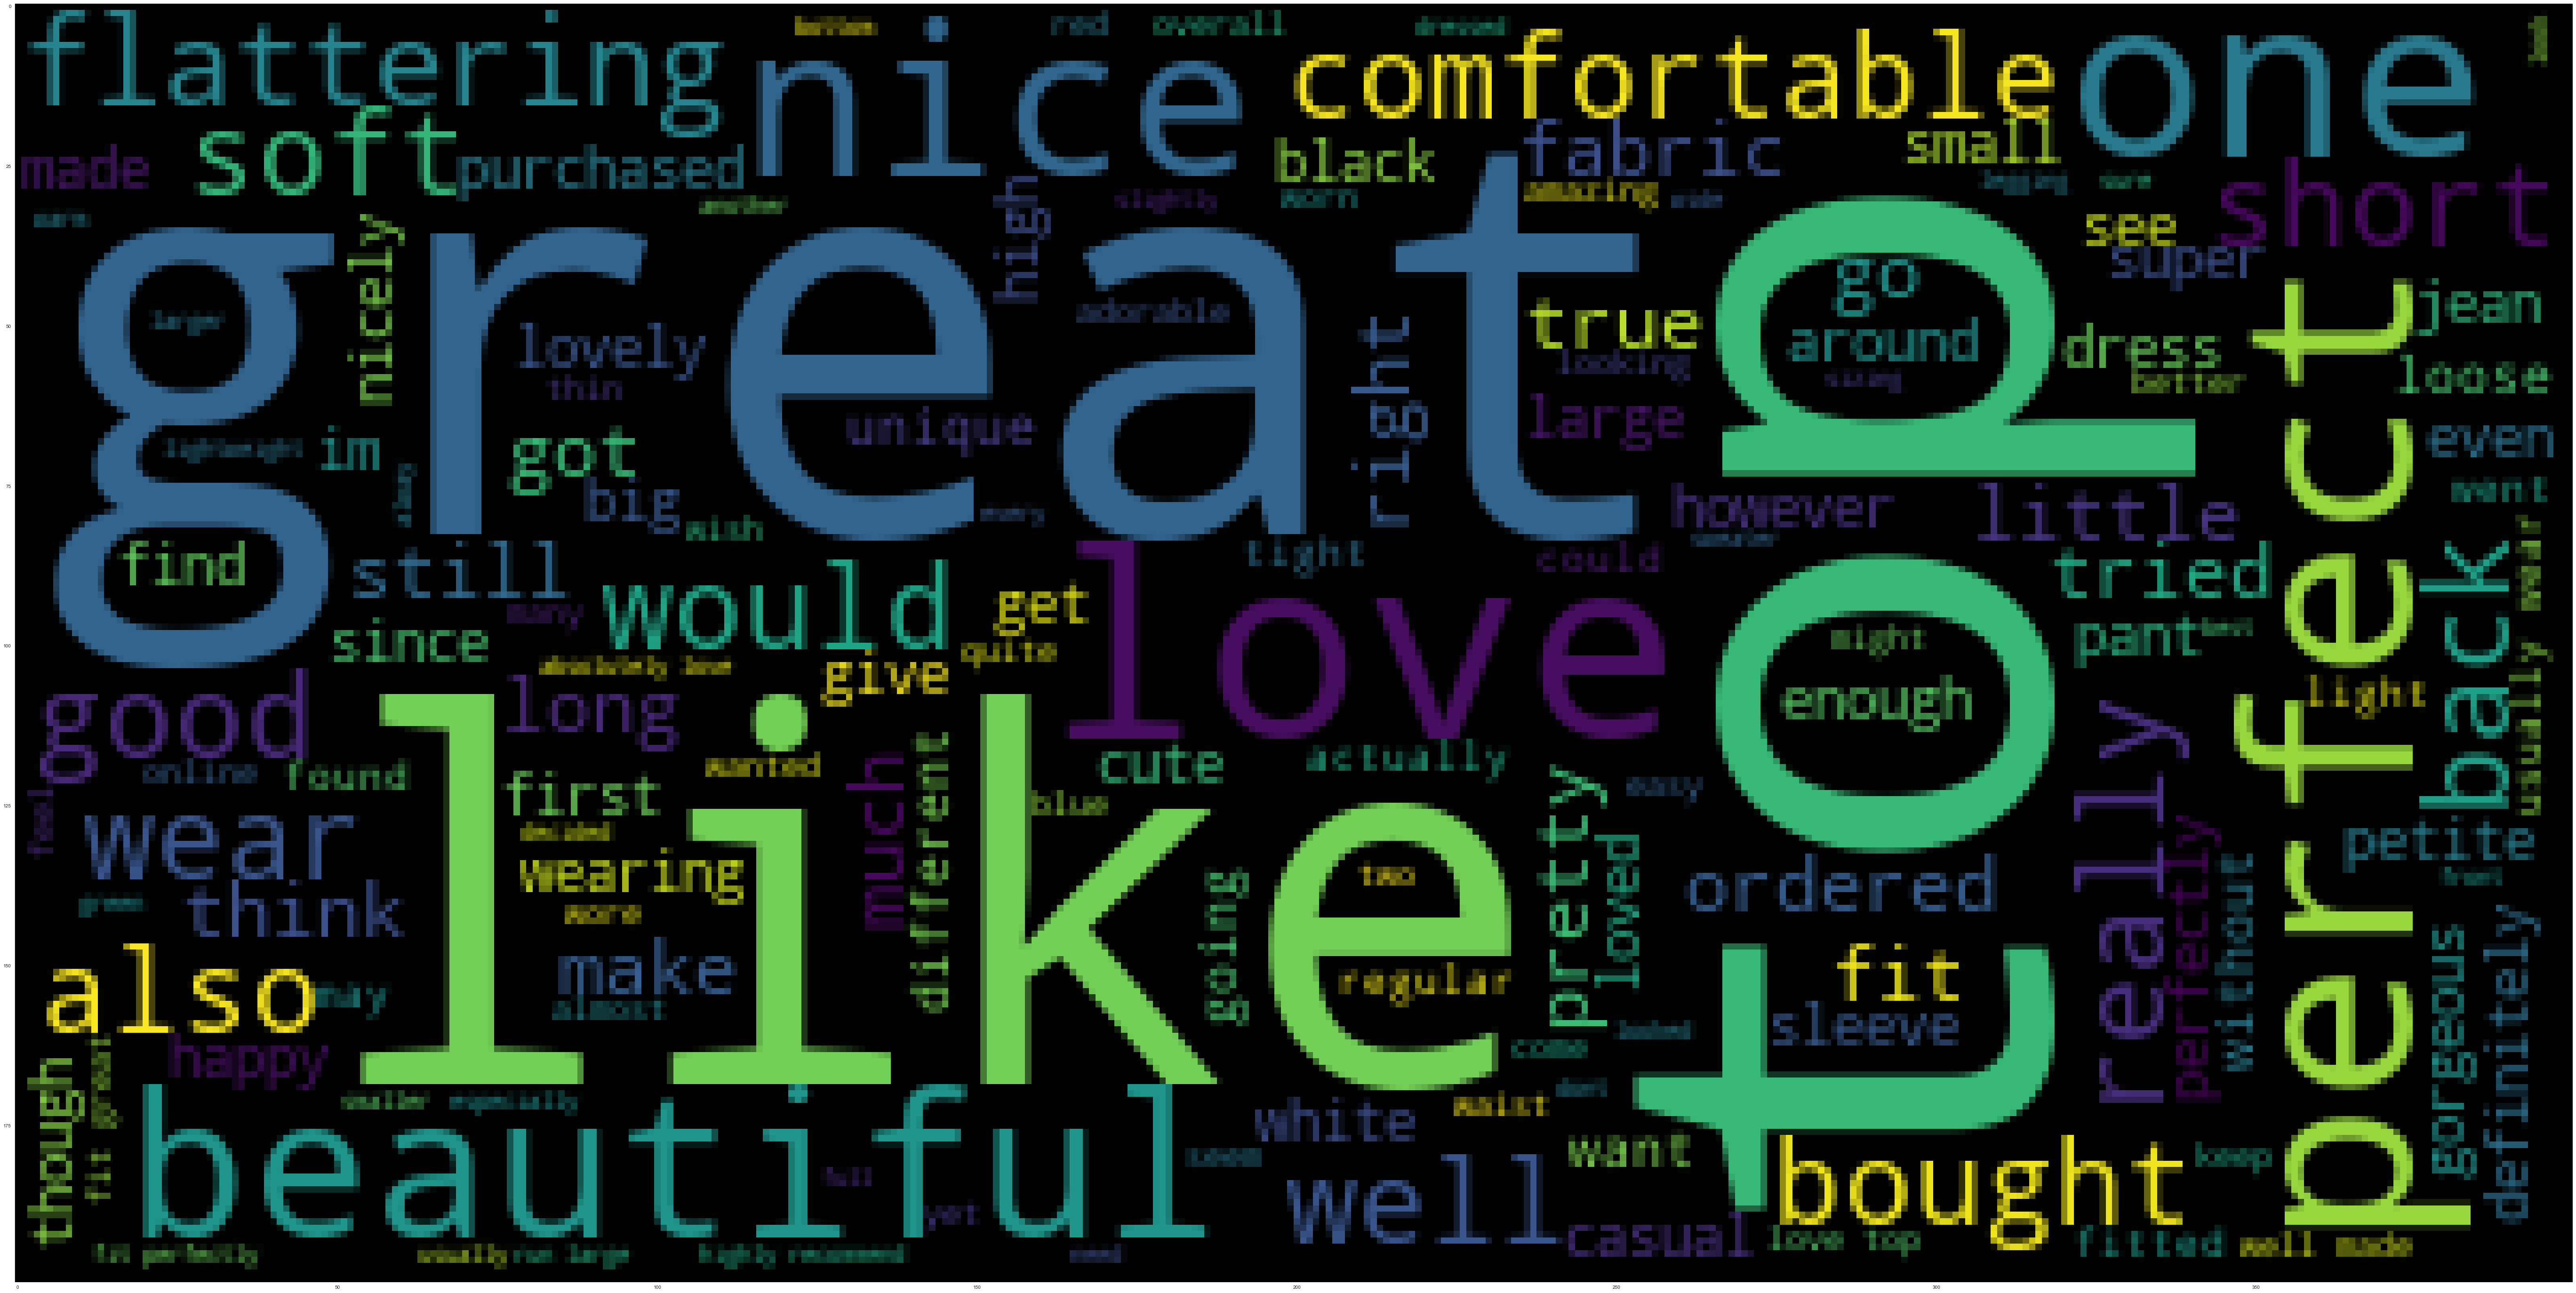

In [22]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(150,50))
plt.imshow(wordcloud)
plt.show()

In [23]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

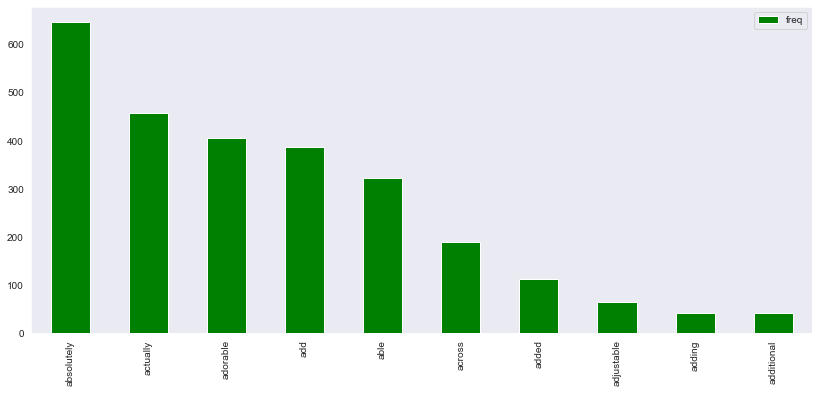

In [24]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green',figsize=(14,6))
plt.show()

### Generating word clouds using word frequencies 

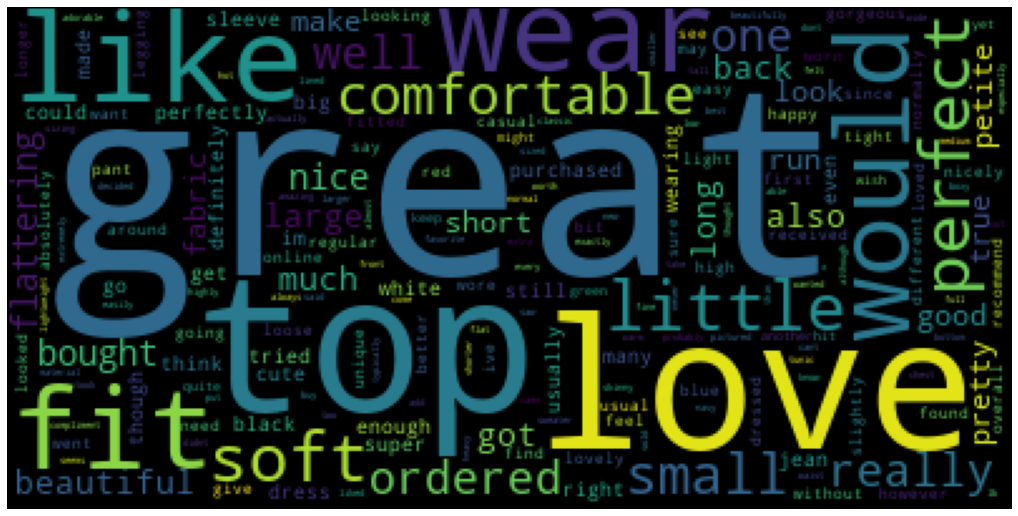

In [25]:
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(18, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Negative reviews word cloud

In [26]:
Negative_review= df[((df.sentiment == 'Negative') & (df.Rating <=3))].loc[:,'text']

In [27]:
Negative_review = Negative_review.apply(lambda x: clean_text(x))
Negative_review=pre_process(Negative_review)

### Generate wordcloud based on words

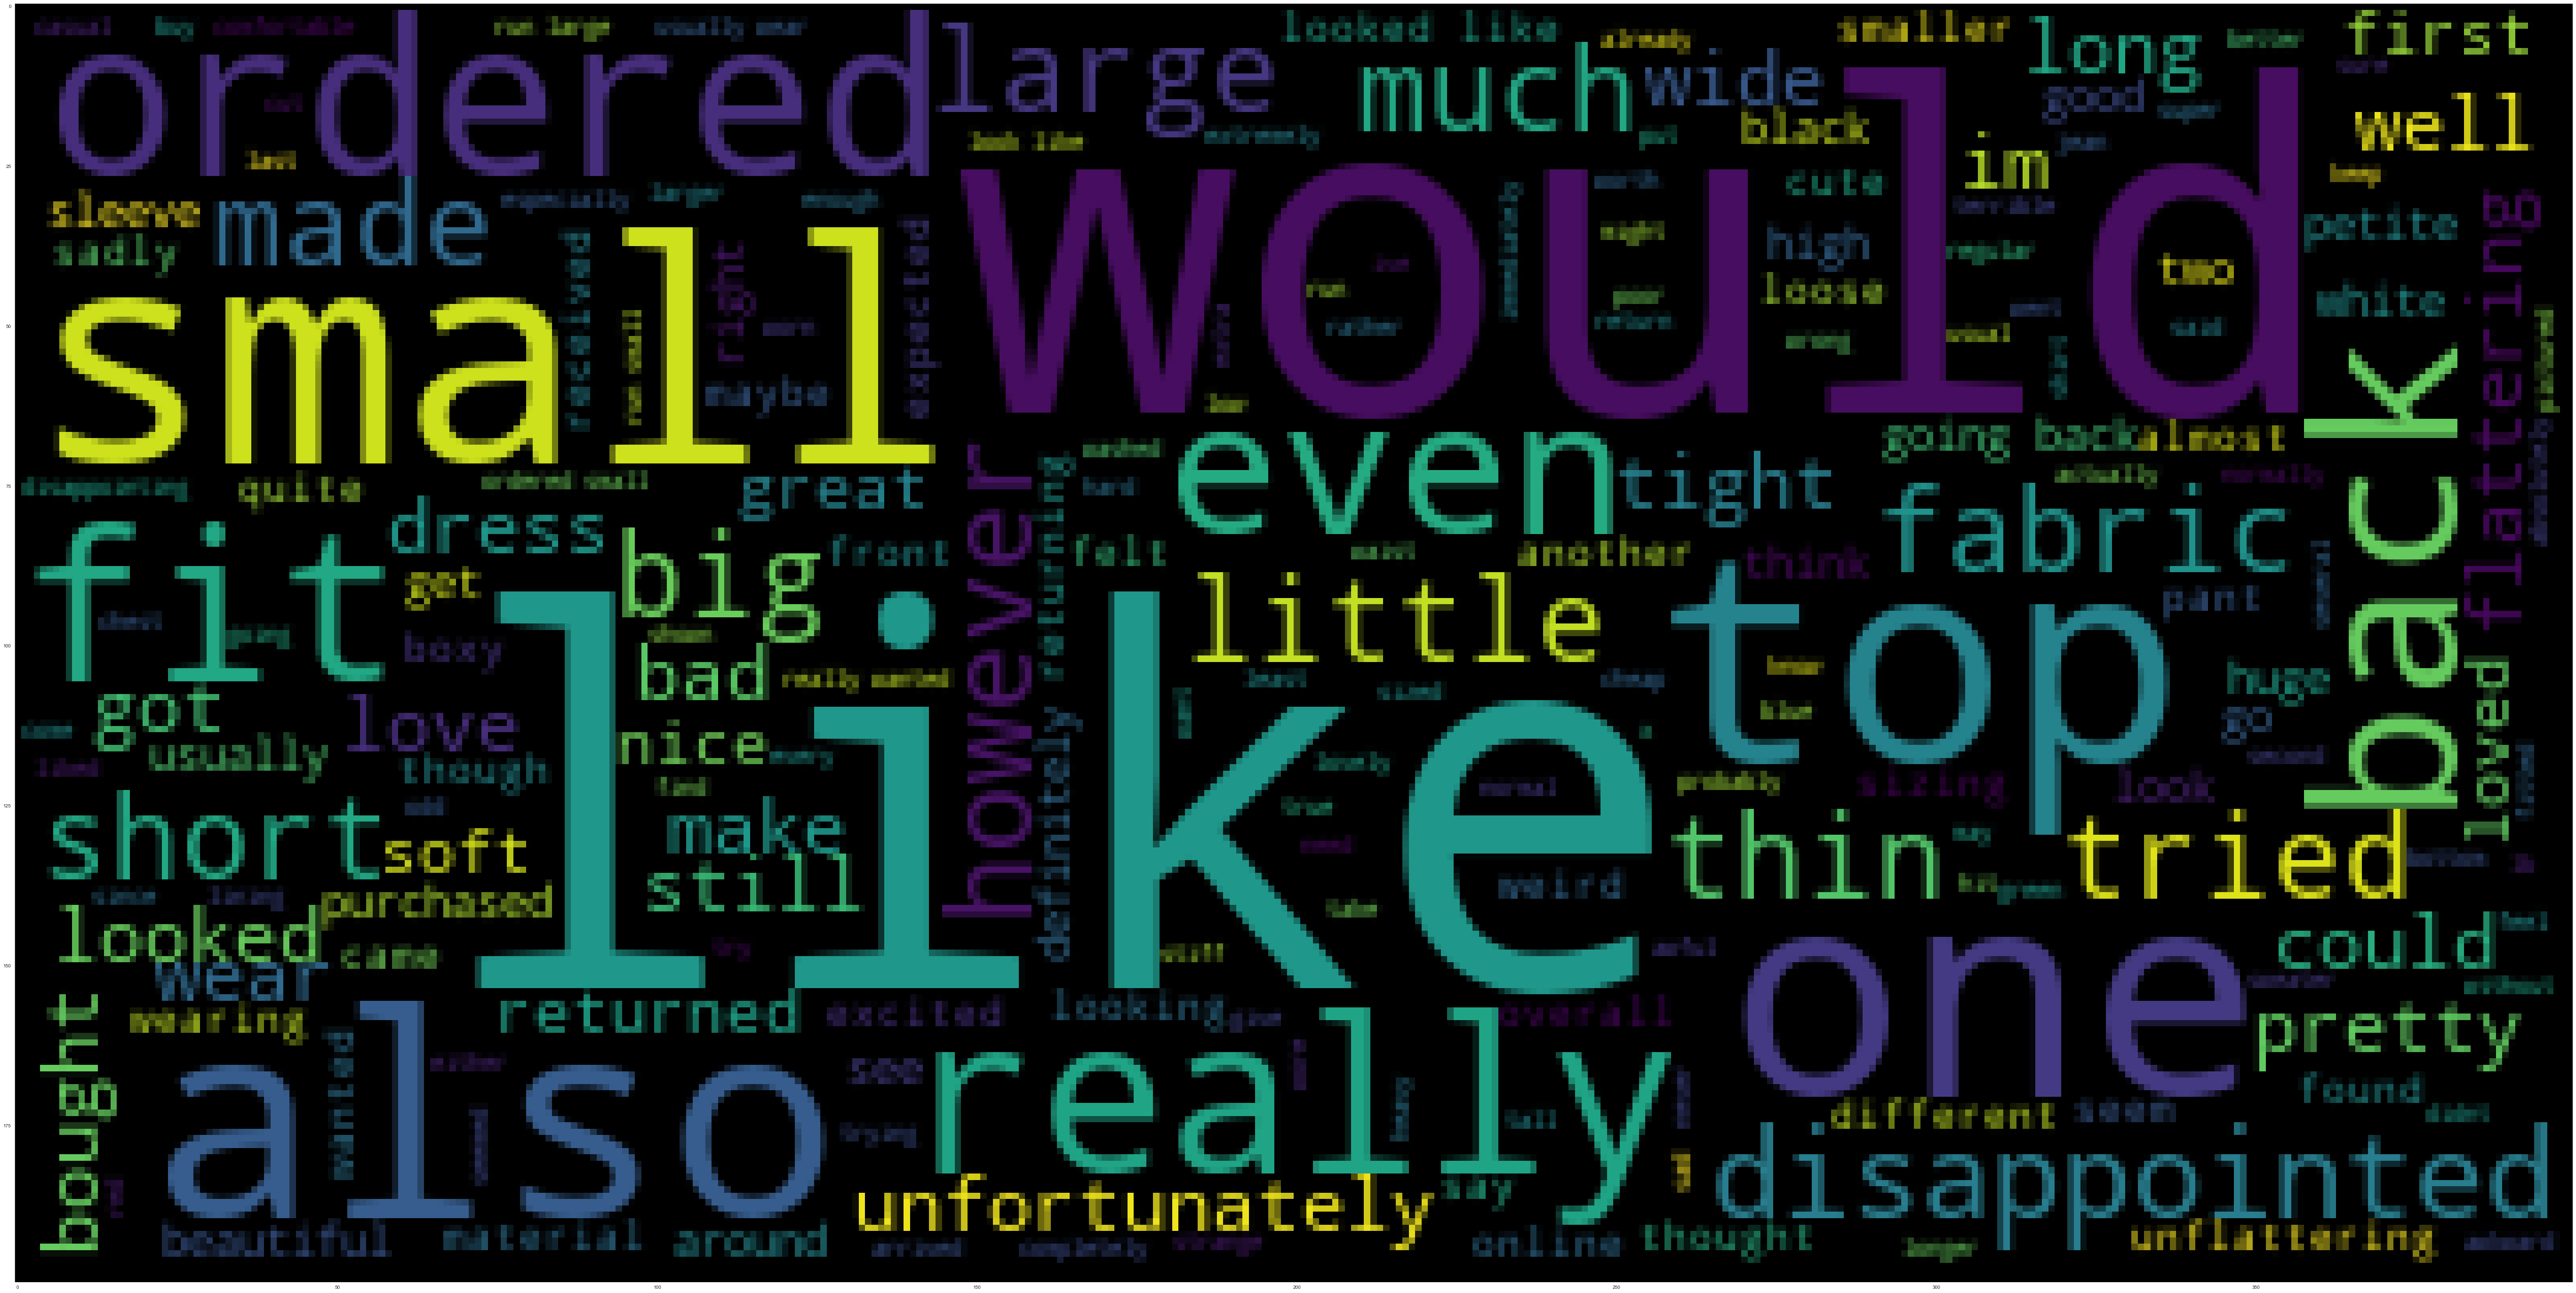

In [28]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)
plt.show()

In [29]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

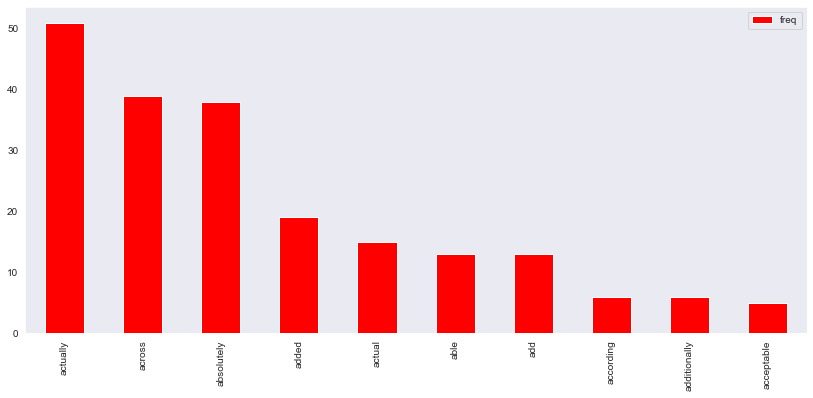

In [30]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red',figsize=(14,6))
plt.show()

### Generating word clouds using word frequencies

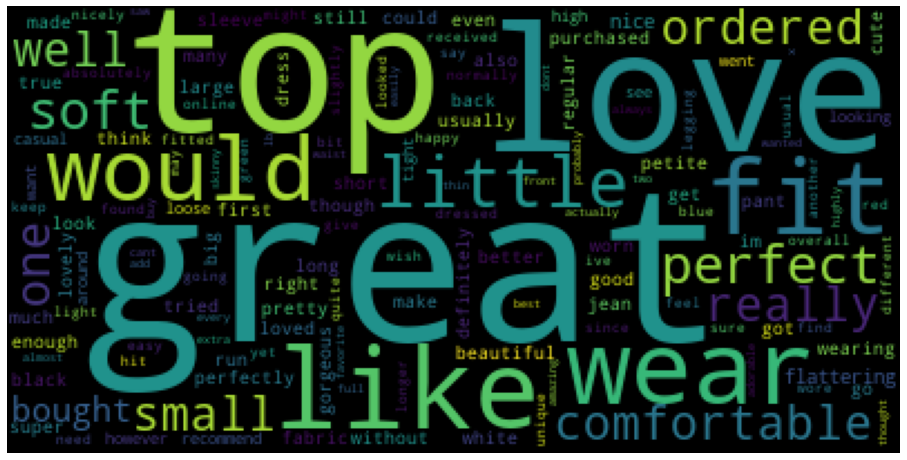

In [31]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(16, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Split the data into train & Test

In [32]:
# define X and y
X = df.text
Y = df.Recommend_Flag

# split the new DataFrame into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [33]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [34]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

##  Models Building

### Decision Trees

In [35]:
#Importing packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [36]:
#Model building
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(4,50)}
data_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
data_tree.fit(dtm_tfidf_train,train_y)

Fitting 3 folds for each of 276 candidates, totalling 828 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 828 out of 828 | elapsed:  4.9min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=True)

In [37]:
print('Best parameters : ',data_tree.best_params_)
print('Accuracy : ' ,data_tree.best_score_)

Best parameters :  {'max_depth': 5, 'max_features': 39}
Accuracy :  0.8248629862749488


In [38]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       0.68      0.09      0.16      2934
           1       0.83      0.99      0.90     12905

    accuracy                           0.82     15839
   macro avg       0.75      0.54      0.53     15839
weighted avg       0.80      0.82      0.76     15839



In [39]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.58      0.08      0.14      1167
           1       0.84      0.99      0.91      5622

    accuracy                           0.83      6789
   macro avg       0.71      0.53      0.52      6789
weighted avg       0.79      0.83      0.78      6789



#### Decision Tree model is giving 83 % Accuracy on Train & Test data.

### RandomForestClassifier

In [40]:
#Importing Required package
from  sklearn.ensemble import RandomForestClassifier

In [41]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4,5,6,7,8]}

data_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1 , verbose=1)
data_rf.fit(dtm_tfidf_train,train_y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 60, 70, 80, 100]},
             verbose=1)

In [42]:
print('Best parameters : ',data_rf.best_params_)
print('Accuracy : ' ,data_rf.best_score_)

Best parameters :  {'max_depth': 8, 'n_estimators': 60}
Accuracy :  0.8156448937183924


In [43]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_rf.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      2934
           1       0.82      1.00      0.90     12905

    accuracy                           0.82     15839
   macro avg       0.91      0.51      0.46     15839
weighted avg       0.85      0.82      0.74     15839



In [44]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_rf.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1167
           1       0.83      1.00      0.91      5622

    accuracy                           0.83      6789
   macro avg       0.91      0.50      0.46      6789
weighted avg       0.86      0.83      0.75      6789



#### RandomForestClassifier model is giving 82 % Accuracy on Train data.

### xgboost

In [45]:
#Importing Required packages
import xgboost

In [46]:
pargrid_xg = {'n_estimators': [70,80,90,100],
               'max_depth':[5,7,9,11,13]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg=gscv_xg.fit(dtm_tfidf_train, train_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 14.2min finished


[21:50:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print('Best parameters : ',data_xg.best_params_)
print('Accuracy : ' ,data_xg.best_score_)

Best parameters :  {'max_depth': 12, 'n_estimators': 100}
Accuracy :  0.8775174911647254


In [48]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_xg.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2934
           1       1.00      1.00      1.00     12905

    accuracy                           1.00     15839
   macro avg       1.00      1.00      1.00     15839
weighted avg       1.00      1.00      1.00     15839



In [49]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_xg.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.72      0.52      0.61      1167
           1       0.91      0.96      0.93      5622

    accuracy                           0.88      6789
   macro avg       0.82      0.74      0.77      6789
weighted avg       0.88      0.88      0.88      6789



#### xgboost model is giving 88% Accuracy on test data .

### LinearSVC

In [50]:
from sklearn.svm import LinearSVC

In [51]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [52]:
print(metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2934
           1       0.93      0.97      0.95     12905

    accuracy                           0.91     15839
   macro avg       0.88      0.83      0.85     15839
weighted avg       0.91      0.91      0.91     15839

              precision    recall  f1-score   support

           0       0.73      0.63      0.67      1167
           1       0.92      0.95      0.94      5622

    accuracy                           0.90      6789
   macro avg       0.83      0.79      0.81      6789
weighted avg       0.89      0.90      0.89      6789



#### LinearSVC model is giving 90% accuracy on test data

### Naive Bayes model

In [172]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB, GaussianNB 

nb_model = MultinomialNB().fit(dtm_tfidf_train, train_y)

In [173]:
print(metrics.classification_report(train_y, nb_model.predict(dtm_tfidf_train)))

print(metrics.classification_report(test_y, nb_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.90      0.20      0.32      2934
           1       0.85      0.99      0.91     12905

    accuracy                           0.85     15839
   macro avg       0.87      0.60      0.62     15839
weighted avg       0.86      0.85      0.80     15839

              precision    recall  f1-score   support

           0       0.88      0.18      0.29      1167
           1       0.85      1.00      0.92      5622

    accuracy                           0.85      6789
   macro avg       0.87      0.59      0.61      6789
weighted avg       0.86      0.85      0.81      6789



#### Naive Bayes model is giving 85% accuracy.

## Topic Modeling

In [53]:
# Importing Gensim
import gensim
from gensim import corpora

In [81]:
text = df.text

In [135]:
text_clean = text.apply(lambda x: clean_text(x))
text_clean = pre_process(text)

In [136]:
text_clean

0                       Absolutely wonderful - comfortable
1        happened find store, never would ordered onlin...
2        I high really wanted initially ordered petite ...
3                       I love, love, every wear it, great
4        This flattering due adjustable perfect wear le...
                               ...                        
23481             I happy great price! easy flattering cut
23482    It reminds shiny material. flattering nicely. ...
23483    This fit top through. never would worked me. a...
23484    I bought wedding unfortunately fit perfect. fi...
23485    This lovely platinum feminine easy wear highly...
Name: text, Length: 22628, dtype: object

In [145]:
text_clean_tokens = [doc.split() for doc in text_clean]  

In [147]:
dictionary = corpora.Dictionary(text_clean_tokens)
print(dictionary)

Dictionary(22592 unique tokens: ['-', 'Absolutely', 'comfortable', 'wonderful', '5\'8".']...)


In [148]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean_tokens]

In [149]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [150]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary,passes=1)

In [151]:
print(ldamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.024*"small" + 0.018*"I" + 0.017*"wear" + 0.016*"fit" + 0.015*"i\'m" + 0.013*"ordered" + 0.013*"usually" + 0.011*"run" + 0.011*"love" + 0.011*"petite"'), (1, '0.038*"This" + 0.021*"great" + 0.021*"little" + 0.014*"beautiful" + 0.014*"-" + 0.014*"nice" + 0.013*"run" + 0.012*"top" + 0.011*"pretty" + 0.010*"one"'), (2, '0.048*"-" + 0.045*"&" + 0.018*"like" + 0.018*"nice" + 0.015*"really" + 0.014*"I" + 0.012*"little" + 0.010*"Very" + 0.010*"well" + 0.010*"great"'), (3, '0.035*"love" + 0.030*"great" + 0.026*"I" + 0.019*"comfortable" + 0.018*"This" + 0.017*"true" + 0.017*"soft" + 0.016*"like" + 0.015*"fit" + 0.015*"perfect"'), (4, '0.009*"top" + 0.009*"covered" + 0.009*"make" + 0.009*"like" + 0.008*"This" + 0.008*"12" + 0.007*"lovely" + 0.007*"back" + 0.006*"definitely" + 0.006*"The"'), (5, '0.034*"like" + 0.023*"I" + 0.015*"would" + 0.015*"long" + 0.015*"really" + 0.013*"sleeve" + 0.012*"little" + 0.012*"ordered" + 0.011*"top" + 0.010*"great"'), (6, '0.031*"I" + 0.029*"would" + 0.026

In [152]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
small I wear fit i'm ordered usually run love petite bought little got one went 6 like great normally found

Topic 2, top 20 words:
This great little beautiful - nice run top pretty one would really back love soft big well make I go

Topic 3, top 20 words:
- & like nice really I little Very well great fit bought cute black soft without jean good tunic This

Topic 4, top 20 words:
love great I comfortable This true soft like fit perfect really flattering super make These good pant back bought would

Topic 5, top 20 words:
top covered make like This 12 lovely back definitely The really dark photo. shown purple swallowed nice good forgiving leather

Topic 6, top 20 words:
like I would long really sleeve little ordered top great wear run also bought large petite short nice love fabric

Topic 7, top 20 words:
I would like top tried much really looked ordered fit small even look wanted little loved dress got back made

Topic 8, top 20 words:
I love - much -- flatterin